In [7]:
print("Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)")

Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)


In [1]:
import numpy as np

import solvers
import plotters

%matplotlib inline

In [2]:
print_progress = False
plot_single = False

# Лабораторная работа 1 Системы ОДУ

$$ y'' + e (y^2 - 1)y'+ y = 0, e > 0, y(0) = 2, y'(0) = 0 $$
$$
    \begin{cases}
        x'= z \\
        z' = e(1-x^2) z - x \\
        x(0) = 2 \\
        z(0) = 0
    \end{cases}
$$

In [3]:
def f(t, x):
    return np.array([
        x[1],
        np.exp(1) * (1 - x[0] ** 2) * x[1] - x[0],
    ])

t_start = 0
t_stop = 100
x_0 = np.array([2.0, 0.0])

## Методы Рунге-Кутта
[Источник](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods)

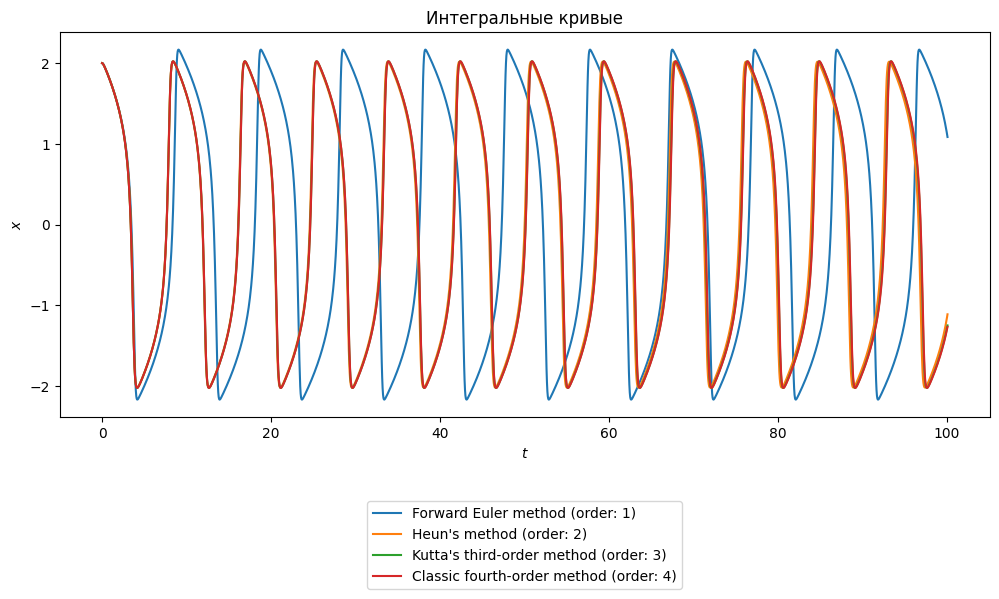

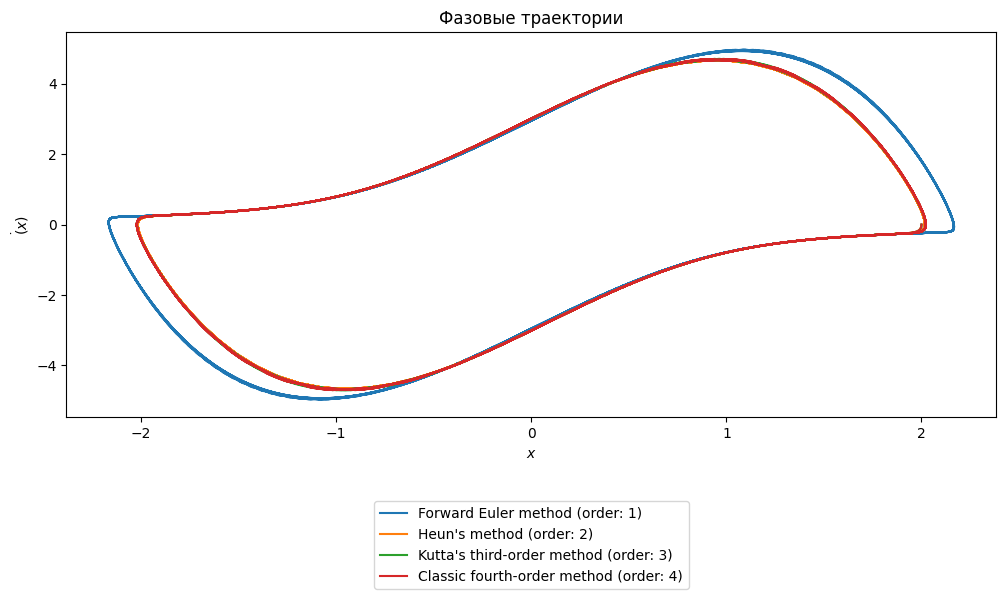

In [4]:
tau = 0.05

methods: list[solvers.RungeKuttaMethod] = []

methods.append(
    solvers.RungeKuttaMethod(
        "Forward Euler method",
        1,
        solvers.ButcherTable(
            [
                [0.0, 0.0],
                [0.0, 1.0],
            ]
        )
    )
)

methods.append(
    solvers.RungeKuttaMethod(
        "Heun's method",
        2,
        solvers.ButcherTable(
            [
                [0.0, 0.0, 0.0],
                [1.0, 1.0, 0.0],
                [0.0, 1/2, 1/2],
            ]
        )
    )
)

methods.append(
    solvers.RungeKuttaMethod(
        "Kutta's third-order method",
        3,
        solvers.ButcherTable(
            [
                [0.0,  0.0, 0.0, 0.0],
                [1/2,  1/2, 0.0, 0.0],
                [1.0, -1.0, 2.0, 0.0],
                [0.0,  1/6, 2/3, 1/6],
            ]
        )
    )
)

methods.append(
    solvers.RungeKuttaMethod(
        "Classic fourth-order method",
        4,
        solvers.ButcherTable(
            [
                [0.0, 0.0, 0.0, 0.0, 0.0],
                [1/2, 1/2, 0.0, 0.0, 0.0],
                [1/2, 0.0, 1/2, 0.0, 0.0],
                [1.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 1/6, 1/3, 1/3, 1/6],
            ]
        )
    )
)

for method in methods:
    tau = method.step or tau
    method = solvers.solve_runge_kutta(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress)
    if plot_single:
        plotters.plot_solutions([method], multidimensionals_solution=False)

plotters.plot_solutions(methods, multidimensionals_solution=False)


## Методы Адамса

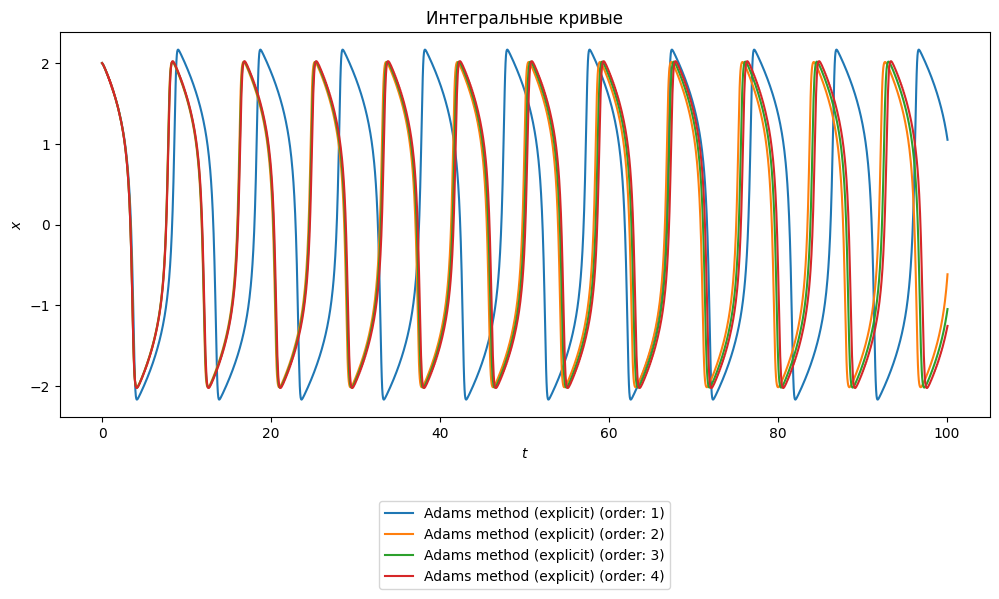

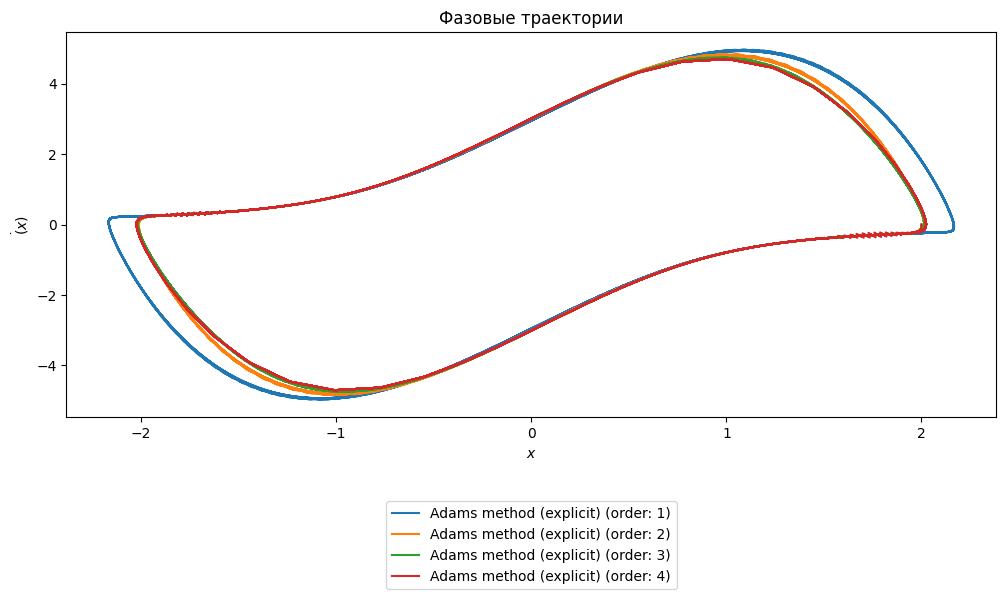

In [5]:
tau = 0.05

methods: list[solvers.AdamsMethod] = []

methods.append(
    solvers.AdamsMethod(
        1,
        "explicit",
    )
)

methods.append(
    solvers.AdamsMethod(
        2,
        "explicit",
    )
)

methods.append(
    solvers.AdamsMethod(
        3,
        "explicit", 
    )
)

methods.append(
    solvers.AdamsMethod(
        4,
        "explicit", 
    )
)

for method in methods:
    method = solvers.solve_adams(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress)
    if plot_single:
        plotters.plot_solutions([method], multidimensionals_solution=False)

plotters.plot_solutions(methods, multidimensionals_solution=False)


## Явные методы дифференцирования назад

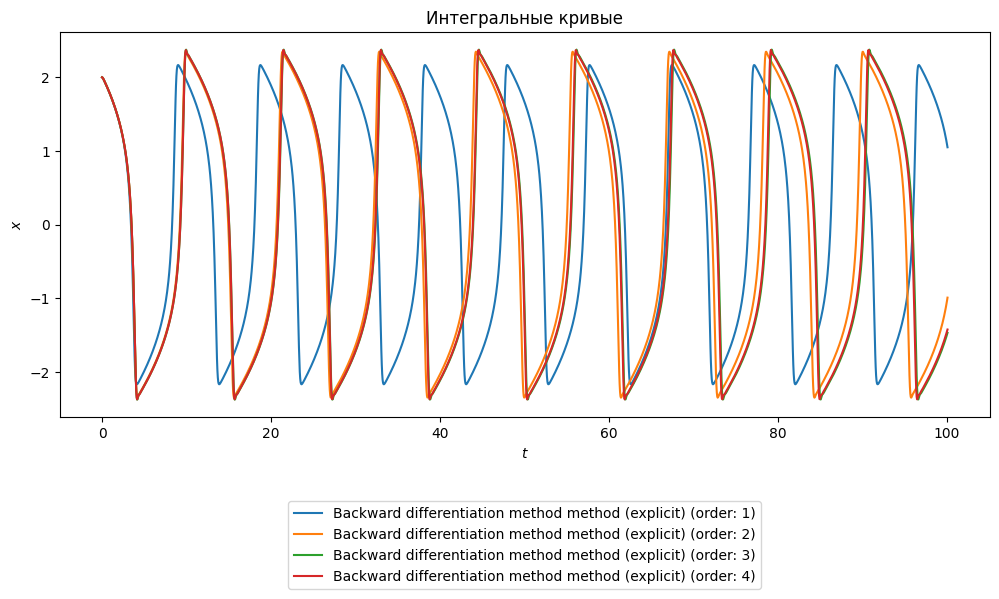

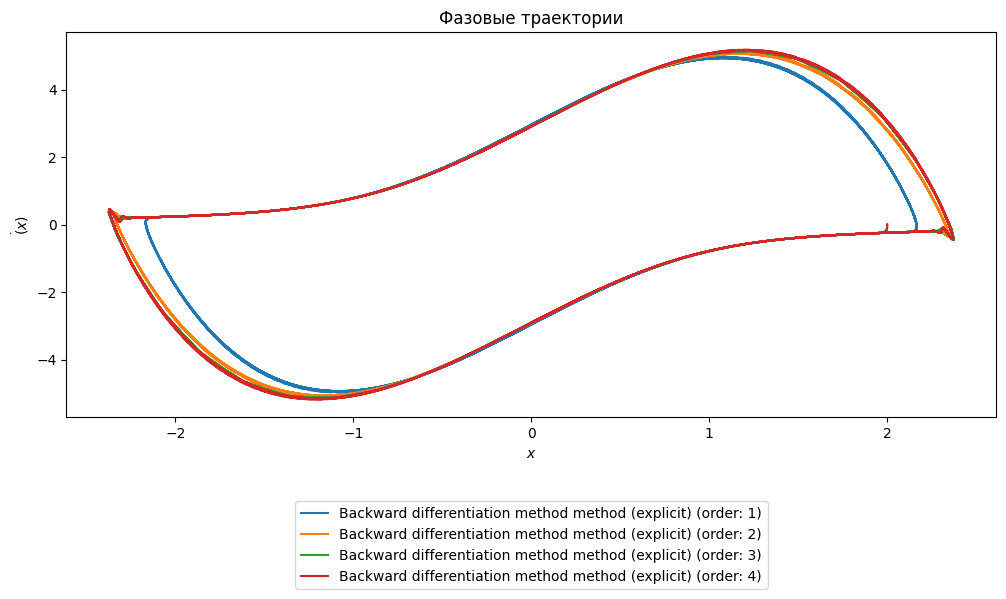

In [6]:
tau = 0.05

methods: list[solvers.BackwardDiffenetiationMethod] = []

methods.append(
    solvers.BackwardDiffenetiationMethod(
        1,
        "explicit",
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        2,
        "explicit",
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        3,
        "explicit",
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        4,
        "explicit",
    )
)

for method in methods:
    method = solvers.solve_backward_differentiation(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress)
    if plot_single:
        plotters.plot_solutions([method], multidimensionals_solution=False)

plotters.plot_solutions(methods, multidimensionals_solution=False)